# 一.经典数据集实战

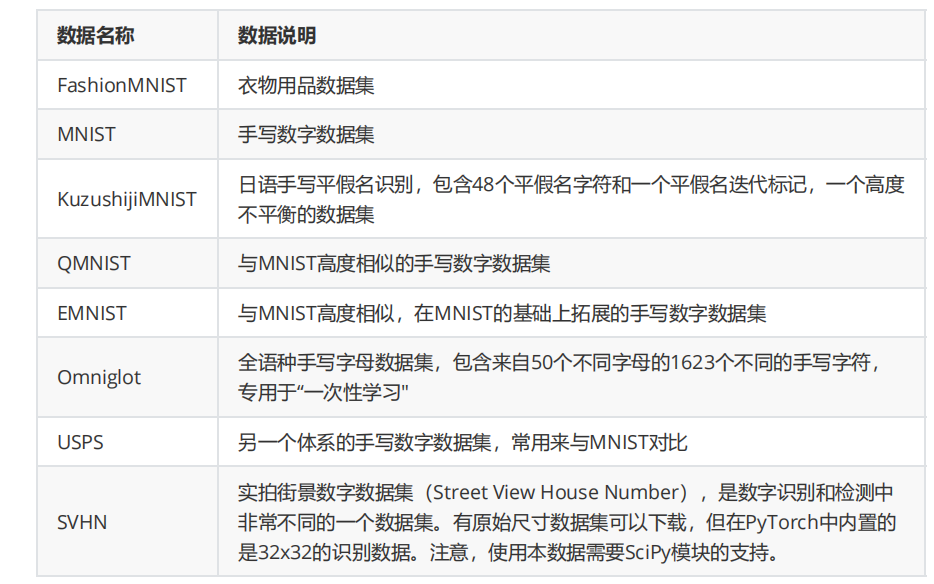

## 1.导入模块

import torchvision:

导入 PyTorch 官方的视觉工具库 torchvision，该库包含：
常用的预训练模型（如 ResNet、VGG 等）；
经典数据集（如 MNIST、CIFAR-10、ImageNet 等）；
图像预处理工具（与下一行的 transforms 配合使用）

import torchvision.transforms as transforms:

从 torchvision 中导入 transforms 模块，并简写为 transforms，方便后续调用。
transforms 是 PyTorch 中用于图像预处理的核心工具，提供了各种数据转换功能，例如：
resize：调整图像尺寸；
ToTensor：将 PIL 图像转换为 PyTorch 张量（Tensor）；
Normalize：对图像像素值进行标准化（减均值、除标准差）；
RandomCrop：随机裁剪（用于数据增强）等。




In [1]:
#在频繁调用数据的过程中，可能出现环境问题，导致jupyter整个崩溃刷新
#为解决/避免该问题，对环境进行了部分修改
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torchvision
import torchvision.transforms as transforms



## 2. 读取FashionMNIST数据集：参数说明
| 参数名   | 类型                          | 作用与说明                                                                 |
|----------|-------------------------------|----------------------------------------------------------------------------|
| `root`   | 字符串（文件路径）            | 指定数据集在电脑中的存储目录（示例：`'E:\\datasets'` 表示存于E盘datasets文件夹）。 |
| `train`  | 布尔值（True/False）          | 选择加载的数据集类型：<br>- `train=True`：加载训练集（60,000个样本，用于模型训练）；<br>- `train=False`：加载测试集（10,000个样本，用于评估模型性能）。 |
| `download` | 布尔值（True/False）         | 控制是否自动下载数据集到`root`目录：<br>- `download=True`：若`root`中无数据集，自动从官方地址下载；<br>- `download=False`：假设数据集已存在，不执行下载（首次使用需设为True，后续可改False避免重复下载）。 |
| `transform` | `torchvision.transforms` 转换函数/组合 | 定义原始图像的预处理操作（加载数据时自动应用）：<br>示例中`transforms.ToTensor()`的作用：将PIL图像（0-255像素值）转换为PyTorch张量，并将像素值归一化到[0, 1]范围（适配神经网络输入）。 |

In [2]:
fmnist = torchvision.datasets.FashionMNIST(
    root='E:\\datasets',  # 数据集存储路径
    train=True,           # 是否加载训练集
    download=False,       # 是否自动下载数据集
    transform=transforms.ToTensor()  # 数据预处理方式
)

## 2.读取SVHN数据集：参数说明
| 参数名   | 类型                          | 作用与说明                                                                 |
|----------|-------------------------------|----------------------------------------------------------------------------|
| `root`   | 字符串（文件路径）            | 指定SVHN数据集在电脑中的存储目录，示例中`'E:\datasets\SVHN'`表示将数据集存于E盘`datasets`文件夹下的`SVHN`子文件夹中。 |
| `split`  | 字符串（可选值："train"/"test"/"val"） | 选择加载的数据集子集，对应不同用途：<br>- `split="train"`：加载训练集（用于模型训练，提供模型学习的基础数据）；<br>- `split="test"`：加载测试集（用于评估训练后模型的泛化性能）；<br>- `split="val"`：加载验证集（可选，部分场景用于训练过程中调整模型参数、避免过拟合）。 |
| `download` | 布尔值（True/False）         | 控制是否自动下载SVHN数据集到`root`指定的目录：<br>- `download=True`：若`root`目录中未存在SVHN数据集，会自动从官方地址下载；<br>- `download=False`：假设数据集已提前下载并存储在`root`目录中，不执行下载操作（首次使用需设为`True`，后续重复使用可改`False`以节省时间）。 |
| `transform` | `torchvision.transforms` 转换函数/组合 | 定义对SVHN原始图像的预处理操作，加载数据时会自动对图像应用该操作：<br>示例中`transforms.ToTensor()`的作用是将原始的PIL图像（像素值范围0-255）转换为PyTorch可处理的张量（Tensor），同时自动将像素值归一化到[0, 1]范围，符合神经网络的输入数据要求。 |


In [3]:
svhn = torchvision.datasets.SVHN(root ='E:\datasets\SVHN'
                                 ,split ="train" #"test","val"
                                 ,download = False
                                 ,transform = transforms.ToTensor())

## 2.读取Omniglot数据集：参数说明

| 参数名       | 类型                          | 作用与说明                                                                 |
|--------------|-------------------------------|----------------------------------------------------------------------------|
| `root`       | 字符串（文件路径）            | 指定Omniglot数据集在电脑中的存储目录，示例中`'E:\datasets'`表示将数据集存于E盘的`datasets`文件夹下（会自动在该目录下创建Omniglot相关子文件夹存储数据）。 |
| `background` | 布尔值（True/False）          | **Omniglot特有参数**，用于选择加载“背景集（Background Set）”或“评估集（Evaluation Set）”，对应少样本学习的不同训练/测试场景：<br>- `background=True`：加载背景集（包含1200个字符类别），通常用于模型的基础训练；<br>- `background=False`：加载评估集（包含423个字符类别），通常用于测试模型在“未见过的新字符”上的少样本泛化能力。 |
| `download`   | 布尔值（True/False）          | 控制是否自动下载Omniglot数据集到`root`指定的目录：<br>- `download=True`：若`root`目录中未存在Omniglot数据集，会自动从官方地址下载（包含图像文件及类别标注）；<br>- `download=False`：假设数据集已提前下载并存储在`root`目录中，不执行下载操作（首次使用需设为`True`，后续重复使用可改`False`以节省时间）。 |
| `transform`  | `torchvision.transforms` 转换函数/组合 | 定义对Omniglot原始图像的预处理操作，加载数据时会自动对图像应用该操作：<br>示例中`transforms.ToTensor()`的作用是将原始的灰度PIL图像（像素值范围0-255，背景为黑色、字符为白色）转换为PyTorch可处理的张量（Tensor），同时自动将像素值归一化到[0, 1]范围，符合神经网络的输入数据要求（若需反转像素（使背景为1、字符为0），可额外添加`transforms.Lambda(lambda x: 1 - x)`）。 |
| `target_transform` | 可选转换函数              | 对“标签”（即字符类别索引）的预处理操作（默认`None`，即不处理）。例如：若需将类别标签转换为特定格式（如独热编码），可自定义函数传入此处。 |




In [4]:
omnist = torchvision.datasets.Omniglot(root ='E:\datasets'
                                       ,background = True
                                       ,download = False
                                       ,transform = transforms.ToTensor())

## 3. 查看数据集方式

快速验证数据集加载是否正常，并查看数据的基本格式（图像形状和标签），能有效降低后续处理的报错概率

In [5]:
#报错概率最低的查看方式
for i in [fmnist,svhn,omnist]:
    for x,y in i:
        print(x.shape,y)
        break
    #图像格式：[3, 32, 32] → 3 个通道（RGB 彩色图）、32×32 像素（符合 SVHN 标准）；
#标签：1 → 对应图像中的数字 “1”。

torch.Size([1, 28, 28]) 9
torch.Size([3, 32, 32]) 1
torch.Size([1, 105, 105]) 0


## 4.可视化函数

随机从数据集中选取 5 个样本，显示图像及其对应的标签，帮助直观了解数据分布（如图像样式、标签含义、预处理效果等）。

In [6]:
#同时，当数据集很大时，我们希望最好只读取一遍，所以一般还是会加上ToTensor
#此时我们就需要自己编写可视化的函数

#使用numpy和matplotlib将图像可视化
import matplotlib.pyplot as plt
import numpy as np
import random

#让每个数据集随机显示5张图像
def plotsample(data):
    fig, axs = plt.subplots(1,5,figsize=(10,10)) #建立子图
    for i in range(5):
        num = random.randint(0,len(data)-1) #首先选取随机数，随机选取五次
        #抽取数据中对应的图像对象，make_grid函数可将任意格式的图像的通道数升为3，而不改变图像原始的数据
        #而展示图像用的imshow函数最常见的输入格式也是3通道
        npimg = torchvision.utils.make_grid(data[num][0]).numpy()
        nplabel = data[num][1] #提取标签
        #将图像由(3, weight, height)转化为(weight, height, 3)，并放入imshow函数中读取
        axs[i].imshow(np.transpose(npimg, (1, 2, 0))) 
        axs[i].set_title(nplabel) #给每个子图加上标签
        axs[i].axis("off") #消除每个子图的坐标轴

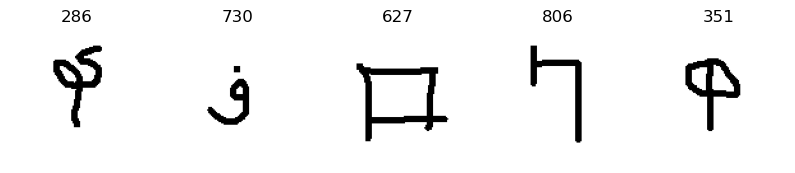

In [7]:
plotsample(omnist)

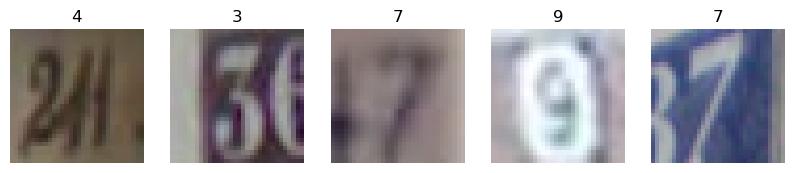

In [8]:
plotsample(svhn)

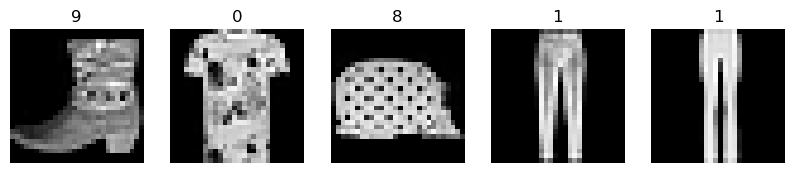

In [9]:
plotsample(fmnist)